In [25]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Formulations

In [2]:
# Problem Data
A = np.array([[1, 2, 0, 1],
              [0, 0, 3, 1],
              [0, 3, 1, 1],
              [2, 1, 2, 5],
              [1, 0, 3, 2]])
c_max = np.array([[100, 100, 100, 100, 100]]).T
p = np.array([[3, 2, 7, 6]]).T
p_disc = np.array([[2, 1, 4, 2]]).T
q = np.array([[4, 10, 5, 10]]).T

Use LaTeX type up here (we will form this problem two ways)

Consider the revenue function for activity level 2 with the provided data:

$$
r_2(x_2) = 
\begin{cases}
    2x_2 & 0 \le x_2 \le 10 \\
    20 + (x_2 - 10) & x_2 \ge 10
\end{cases}
$$

In [30]:
x2_2 = np.linspace(0, 20, 100)
r2_1 = 20 + x2_2 - 10

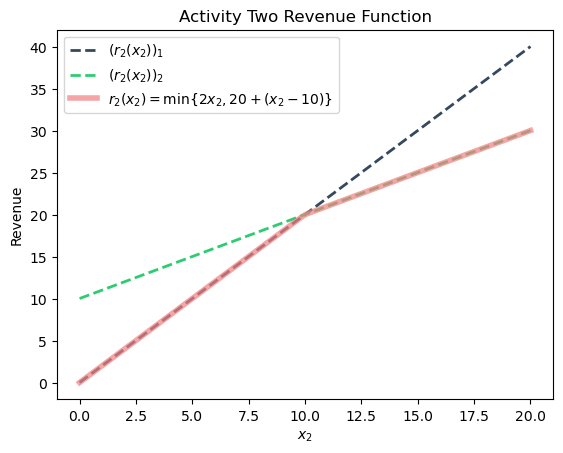

In [63]:
x2_1 = [0, 20]
r2_1 = [0, 40]

x2_2 = [0, 20]
r2_2 = [10, 30]

x2_3 = np.linspace(0, 20, 100)
min_x = np.minimum(2 * x2_3, 20 + x2_3 - 10)

# Create the plot
plt.figure()

# Plot the dashed lines with enhanced visibility
plt.plot(x2_1, r2_1, label='$(r_2(x_2))_1$', linestyle="--", color='#34495E', linewidth=2)
plt.plot(x2_2, r2_2, label='$(r_2(x_2))_2$', color="#2ECC71", linestyle="--", linewidth=2)

# Plot the solid red line with increased width and transparency
plt.plot(x2_3, min_x, label='$r_2(x_2) = \min \{2x_2, 20 + (x_2 - 10)\}$', color="lightcoral", linewidth=4, alpha=0.7)

# Add title and labels
plt.title('Activity Two Revenue Function')
plt.xlabel('$x_2$')
plt.ylabel('Revenue')

# Add legend
plt.legend()

# Display the plot
plt.show()

# Plot all of them

# Convex Formulation Instantiation

In [48]:
x = cp.Variable((4, 1))

constraints = [ A @ x <= c_max,
               x >= 0 ]
f0 = cp.sum([cp.minimum(x[j]@p[j], q[j]@p[j] + p_disc[j]@(x[j] - q[j])) for j in range(x.shape[0])])
problem = cp.Problem(cp.Maximize(f0), constraints)

In [49]:
problem.solve()

192.49999991412406

# LP Instantiation

In [ ]:
x = cp.Variable((4, 1))
t = cp.Variable((4, 1))

constraints = [A@x == c_max,
               x >= 0]
f0 = cp.sum(t)
constraints += [t <= cp.m]